#                               [           Oasis Infobyte-Data Science Internship                   ]


**NAME:-YASH DAHAKE**

# TASK-2 EMAIL SPAM DETECTION WITH MACHINE LEARNING[ JAN-2023]¶

**When classifying emails there are mainly two types, they are as follows:->**

> **"Spam"** refers to **unwanted** or unsolicited emails that are typically sent in bulk and often contain scams, fake offers, or links to phishing websites. They are the emails which we want to filter out and classify as spam.

> **"Ham"** refers to legitimate or **non-spam** emails. These are emails that are sent for personal or professional reasons and are not considered unwanted or unsolicited. They are the emails which we want to classify as non-spam, also known as "ham"

Now that we know we have to classify the data into two categories we will be using Logistic Regresssion. 

A logistic regression model can be used to classify email messages as spam or ham by using a dataset of labeled email messages (provided to us) 

And using it to predict new unseen email messages. It works by assigning a probability of an email being spam based on certain words or phrases in the email.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import colors

Collecting and preparing data for analysis

In [2]:
# loading the data from csv file to a pandas Dataframe
# the data wasn't in utf8 format so I first saved the file as utf8 csv using Excel

data = pd.read_csv('spam.csv') 

In [3]:
data.head()#shows first 5 rows by default

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()#shows last 5 rows by default

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.info()#shows the information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We only require the first 2 columns and the rest aren't useful so we drop them<br>
Also the columns don't have relevant name so we should be changing that!

In [6]:
data.columns # dropping last 3 columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
data.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
data.rename(columns={'v1':'Category','v2':'Mail'}, inplace=True)
data.columns


Index(['Category', 'Mail'], dtype='object')

In [8]:
# checking the number of rows and columns in the dataframe
print("Rows :",data.shape[0], "\nColumns :", data.shape[1])

Rows : 5572 
Columns : 2


### Label Encoding
Encoding the Category column as<br>
Spam : 0<br>
Ham :1

In [9]:
# label spam mail as 0;  ham mail as 1;
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [10]:
# Assigning both the columns as variable X and Y for easy calling
Y = data['Category']
X = data['Mail']

### Pie Chart  To Check Email Category

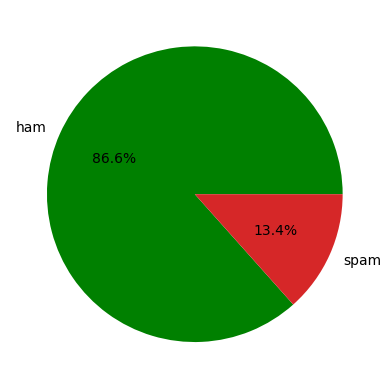

In [11]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],colors = ['green','#d62728'],autopct='%1.1f%%')

plt.show()

In [12]:
data['Category']=data['Mail'].apply(len)
data.head()

,Category,Mail
0,111,"Go until jurong point, crazy.. Available only ..."
1,29,Ok lar... Joking wif u oni...
2,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,49,U dun say so early hor... U c already then say...
4,61,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:ylabel='Frequency'>

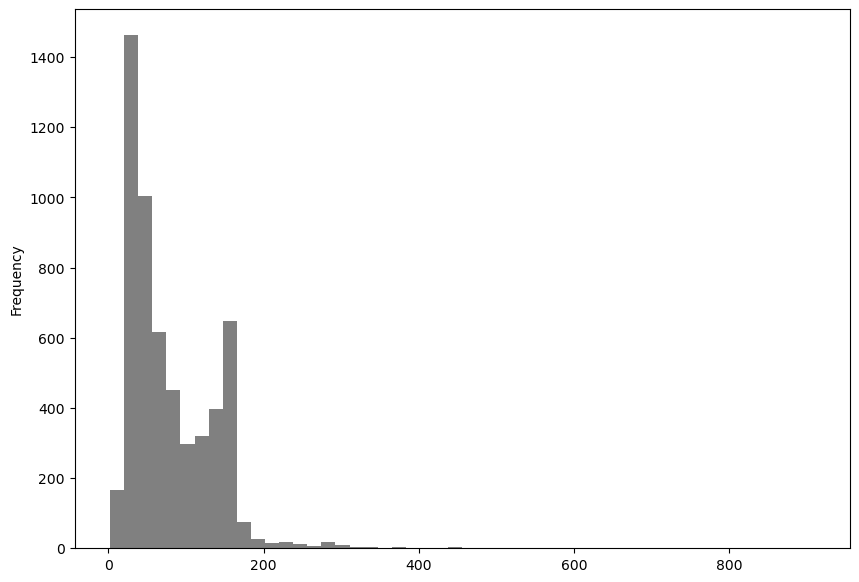

In [13]:
data['Category'].plot(bins=50, kind='hist',color='grey',figsize=(10,7))

### Train-Test Split :
Now splitting the data into training and tplting in the ratio 30:70 respectively

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [15]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])

Total No of Rows  : 5572
Rows for training : 3900
Rows for testing  : 1672


### Feature Extraction

In [16]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [17]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
print(X_train)
print("-----------------------------------------------------------------------------------------------------------------------")
print(X_train_features)

1256       Not yet chikku..going to room nw, i'm in bus..
4163                  Its ok, called mom instead have fun
1994               Have you been practising your curtsey?
3587    If you were/are free i can give. Otherwise nal...
1598                  Daddy will take good care of you :)
                              ...                        
3671     came to look at the flat, seems ok, in his 50...
709     4mths half price Orange line rental & latest c...
2487    K ill drink.pa then what doing. I need srs mod...
174     Well, i'm gonna finish my bath now. Have a goo...
1146                            Babe ? I lost you ... :-(
Name: Mail, Length: 3900, dtype: object
-----------------------------------------------------------------------------------------------------------------------
  (0, 1416)	0.4541283081025466
  (0, 4354)	0.5404817119861236
  (0, 5206)	0.4327984288284353
  (0, 2863)	0.31622834091458635
  (0, 1612)	0.46296020908336527
  (1, 2748)	0.4325789275779803
  (1, 3321)	0.

### Trainning the model using Logistic Regression

In [19]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

### Model Evaluation :

In [20]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9666666666666667


In [21]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9551435406698564


### Predicting for new inputs:

## Spam Email check 

In [22]:
# Get input mail from user
get_mail = input("Enter the text of the email :")

Enter the text of the email : REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode


In [23]:
# Convert input to a list
list_mail = [get_mail]

In [24]:
# Convert text to feature vectors
input_data_features = feature_extraction.transform(list_mail)

In [25]:
# Make prediction
prediction = model.predict(input_data_features)

In [26]:
# Check prediction and print result
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Spam mail


###  Ham Email check 

In [27]:
# Get input mail from user
get_mail = input("Enter the text of the email :")

Enter the text of the email : You are a great role model. You are giving so much and i really wish each day for a miracle but God as a reason for everything and i must say i wish i knew why but i dont. I've looked up to you since i was young and i still do. Have a great day.


In [28]:
# Convert input to a list
list_mail = [get_mail]

In [29]:
# Convert text to feature vectors
input_data_features = feature_extraction.transform(list_mail)

In [30]:
# Make prediction
prediction = model.predict(input_data_features)

In [31]:
# Check prediction and print result
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


### Conclusion :->
A logistic regression model was developed to detect spam emails with an accuracy around 95%. The model was trained using a dataset and the results show the effectiveness of using logistic regression for this specific problem. The model can be confidently used to classify new incoming emails as spam or non-spam.